In [ ]:
import numpy as np
import pandas as pd

# Example arrays of different lengths
array1 = np.array([1., 2, 3, 4, 5])
array2 = np.array([2., 3, 4])
array3 = np.array([3., 4, 5, 6])

# Find the maximum length
max_length = max(len(array1), len(array2), len(array3))

# if the array is shorter than the maximum length, pad with NaN
array1_padded = np.pad(array1, (0, max_length - len(array1)), constant_values=np.nan)
array2_padded = np.pad(array2, (0, max_length - len(array2)), constant_values=np.nan)
array3_padded = np.pad(array3, (0, max_length - len(array3)), constant_values=np.nan)

print(f"array1_padded: {array1_padded}")
print(f"array2_padded: {array2_padded}")
print(f"array3_padded: {array3_padded}")

array1_padded: [1. 2. 3. 4. 5.]
array2_padded: [ 2.  3.  4. nan nan]
array3_padded: [ 3.  4.  5.  6. nan]


In [3]:
# Stack the arrays and compute the element-wise mean
stacked = np.vstack([array1_padded, array2_padded, array3_padded])

print(f"stacked: {stacked}")

stacked_Array = np.array([array1_padded, array2_padded, array3_padded])
print(f"stacked_Array: {stacked_Array}")

# Calculate the mean  and standard deviation of the stacked array
mean_nan = np.nanmean(stacked, axis=0)
std_nan = np.nanstd(stacked, axis=0)

print(f"mean (ignore Nan): {mean_nan}")
print(f"std: (ignore){std_nan}")

# compare with regular mean and std
mean = np.mean(stacked, axis=0)
std = np.std(stacked, axis=0)

print(f"mean: {mean}")
print(f"std: {std}")




stacked: [[ 1.  2.  3.  4.  5.]
 [ 2.  3.  4. nan nan]
 [ 3.  4.  5.  6. nan]]
stacked_Array: [[ 1.  2.  3.  4.  5.]
 [ 2.  3.  4. nan nan]
 [ 3.  4.  5.  6. nan]]
mean (ignore Nan): [2. 3. 4. 5. 5.]
std: (ignore)[0.81649658 0.81649658 0.81649658 1.         0.        ]
mean: [ 2.  3.  4. nan nan]
std: [0.81649658 0.81649658 0.81649658        nan        nan]


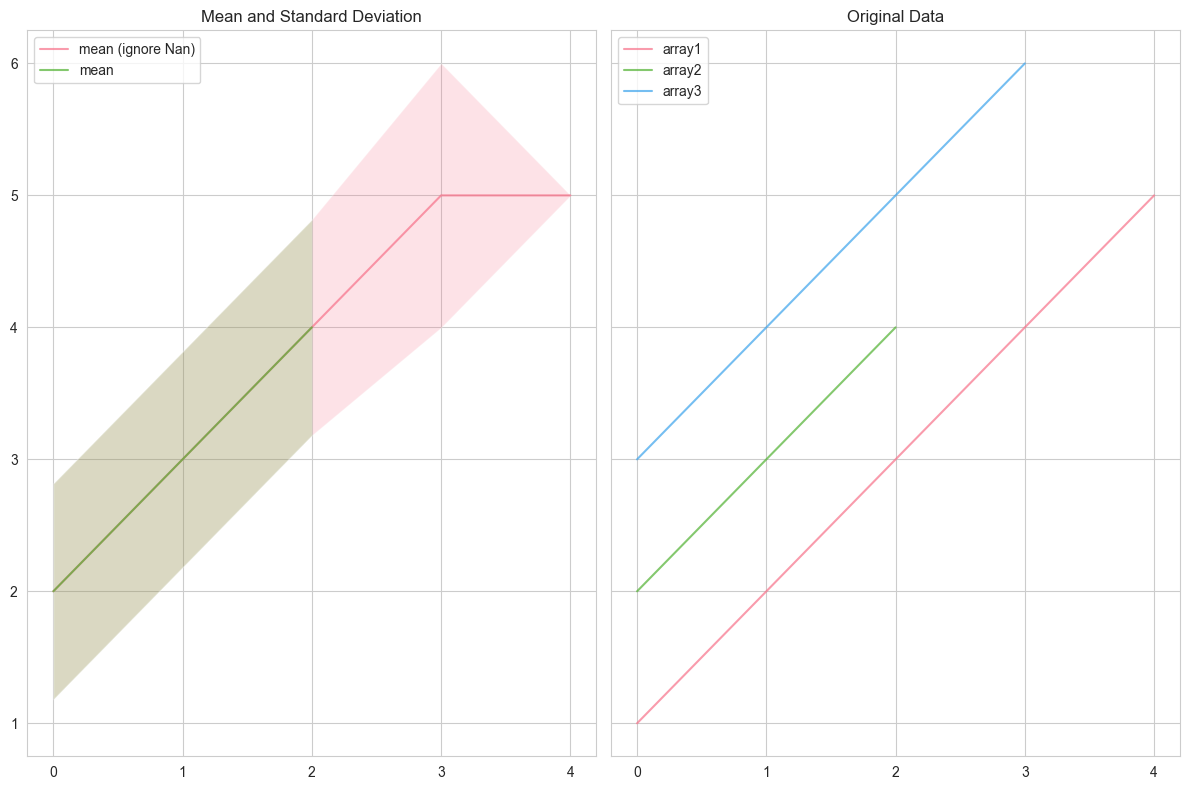

In [21]:
# plot to compare

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 

palette = sns.color_palette("husl", 3)

sns.set_palette(palette)

fig, ax = plt.subplots(figsize=(12,8), nrows=1, ncols=2, sharey=True)

left_ax = ax[0]
right_ax = ax[1]
# plot the avgs on the left

left_ax.plot(mean_nan, label="mean (ignore Nan)" , alpha=0.7)
left_ax.plot(mean, label="mean" , alpha=0.7)
left_ax.fill_between(np.arange(0, max_length, 1), mean_nan - std_nan, mean_nan + std_nan, alpha=0.2)
left_ax.fill_between(np.arange(0, max_length, 1), mean - std, mean + std, alpha=0.2)
left_ax.set_xticks(np.arange(0, max_length, 1))
left_ax.set_title("Mean and Standard Deviation")


# plot the original data on the right
right_ax.plot(array1_padded, label="array1", alpha=0.7)
right_ax.set_xticks(np.arange(0, max_length, 1))
right_ax.plot(array2_padded, label="array2", alpha=0.7)
right_ax.plot(array3_padded, label="array3", alpha=0.7)
right_ax.set_title("Original Data")



left_ax.legend(loc='upper left')
right_ax.legend(loc='upper left')
fig.tight_layout()
plt.show()


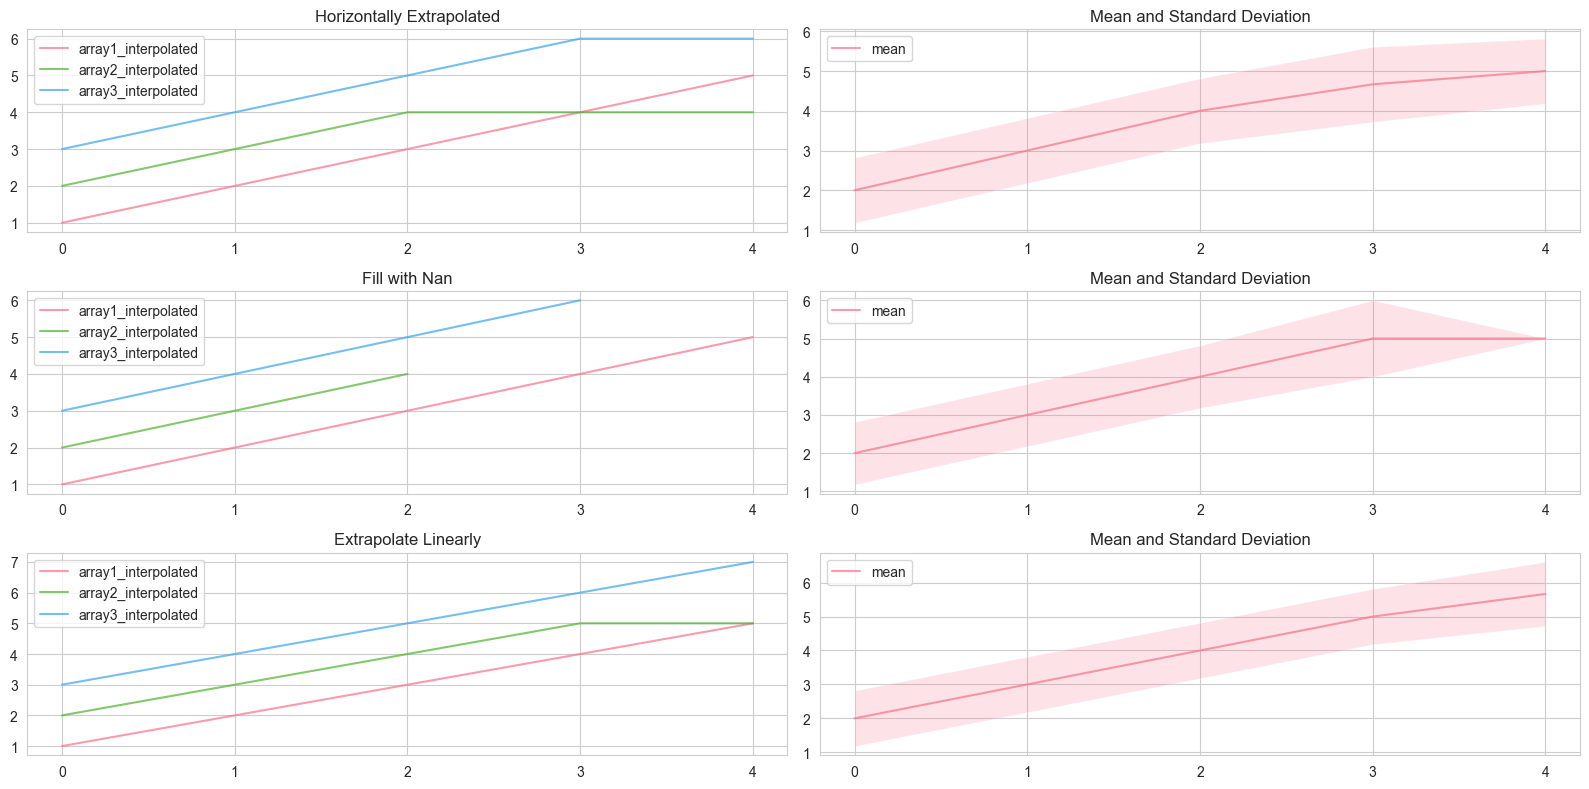

In [22]:


# Try to linearly interpolate the missing values Using np.interp
# extrapolate vs fill_with_nan

common_x_axis = np.arange(0, max_length, 1)

# Defualt behavior is Horizontally extrapolate the values ( using edge values)
# for axex [0][0]
array1_x_axis = np.arange(0, len(array1), 1)
array1_interpolated = np.interp(x=common_x_axis, xp=array1_x_axis, fp=array1)

array2_x_axis = np.arange(0, len(array2), 1)
array2_interpolated = np.interp(x=common_x_axis, xp=array2_x_axis, fp=array2)

array3_x_axis = np.arange(0, len(array3), 1)
array3_interpolated = np.interp(x=common_x_axis, xp=array3_x_axis, fp=array3)

# add to plot
fig, ax = plt.subplots(figsize=(16,8), nrows=3, ncols=2)

top_left_ax = ax[0][0]
top_right_ax = ax[0][1]
middle_left_ax = ax[1][0]
middle_right_ax = ax[1][1]
bottom_left_ax = ax[2][0]
bottom_right_ax = ax[2][1]

top_left_ax.plot(array1_interpolated, label="array1_interpolated", alpha=0.7)
top_left_ax.plot(array2_interpolated, label="array2_interpolated", alpha=0.7)
top_left_ax.plot(array3_interpolated, label="array3_interpolated", alpha=0.7)
top_left_ax.set_xticks(common_x_axis)
top_left_ax.set_title("Horizontally Extrapolated")
top_left_ax.legend(loc='upper left')

# Avg of the interpolated values on the right

interpolated_stacked = np.vstack([array1_interpolated, array2_interpolated, array3_interpolated])
interpolated_mean = np.mean(interpolated_stacked, axis=0)
interpolated_std = np.std(interpolated_stacked, axis=0)

top_right_ax.plot(interpolated_mean, label="mean", alpha=0.7)
top_right_ax.fill_between(common_x_axis, interpolated_mean - interpolated_std, interpolated_mean + interpolated_std, alpha=0.2)
top_right_ax.set_xticks(common_x_axis)
top_right_ax.set_title("Mean and Standard Deviation")
top_right_ax.legend(loc='upper left')


# Fill with Nan

array1_interpolated = np.interp(x=common_x_axis, xp=array1_x_axis, fp=array1, left=np.nan, right=np.nan)
array2_interpolated = np.interp(x=common_x_axis, xp=array2_x_axis, fp=array2, left=np.nan, right=np.nan)
array3_interpolated = np.interp(x=common_x_axis, xp=array3_x_axis, fp=array3, left=np.nan, right=np.nan)

middle_left_ax.plot(array1_interpolated, label="array1_interpolated", alpha=0.7)
middle_left_ax.plot(array2_interpolated, label="array2_interpolated", alpha=0.7)
middle_left_ax.plot(array3_interpolated, label="array3_interpolated", alpha=0.7)
middle_left_ax.set_xticks(common_x_axis)
middle_left_ax.set_title("Fill with Nan")
middle_left_ax.legend(loc='upper left')

# Avg of the interpolated values on the right

interpolated_stacked = np.vstack([array1_interpolated, array2_interpolated, array3_interpolated])
interpolated_mean = np.nanmean(interpolated_stacked, axis=0)
interpolated_std = np.nanstd(interpolated_stacked, axis=0)

middle_right_ax.plot(interpolated_mean, label="mean", alpha=0.7)
middle_right_ax.fill_between(common_x_axis, interpolated_mean - interpolated_std, interpolated_mean + interpolated_std, alpha=0.2)
middle_right_ax.set_xticks(common_x_axis)
middle_right_ax.set_title("Mean and Standard Deviation")
middle_right_ax.legend(loc='upper left')



# extrapolate linearly

array1_slope_right = (array1[-1] - array1[-2]) / (array1_x_axis[-1] - array1_x_axis[-2])
array1_slope_left = (array1[1] - array1[0]) / (array1_x_axis[1] - array1_x_axis[0])

array2_slope_right = (array2[-1] - array2[-2]) / (array2_x_axis[-1] - array2_x_axis[-2])
array2_slope_left = (array2[1] - array2[0]) / (array2_x_axis[1] - array2_x_axis[0])

array3_slope_right = (array3[-1] - array3[-2]) / (array3_x_axis[-1] - array3_x_axis[-2])
array3_slope_left = (array3[1] - array3[0]) / (array3_x_axis[1] - array3_x_axis[0])


array1_interpolated = np.interp(x=common_x_axis, xp=array1_x_axis, fp=array1, left=array1[0] - array1_slope_left, right=array1[-1] + array1_slope_right)
array2_interpolated = np.interp(x=common_x_axis, xp=array2_x_axis, fp=array2, left=array2[0] - array2_slope_left, right=array2[-1] + array2_slope_right)
array3_interpolated = np.interp(x=common_x_axis, xp=array3_x_axis, fp=array3, left=array3[0] - array3_slope_left, right=array3[-1] + array3_slope_right)

bottom_left_ax.plot(array1_interpolated, label="array1_interpolated", alpha=0.7)
bottom_left_ax.plot(array2_interpolated, label="array2_interpolated", alpha=0.7)
bottom_left_ax.plot(array3_interpolated, label="array3_interpolated", alpha=0.7)
bottom_left_ax.set_xticks(common_x_axis)
bottom_left_ax.set_title("Extrapolate Linearly")
bottom_left_ax.legend(loc='upper left')

# Avg of the interpolated values on the right

interpolated_stacked = np.vstack([array1_interpolated, array2_interpolated, array3_interpolated])
interpolated_mean = np.mean(interpolated_stacked, axis=0)
interpolated_std = np.std(interpolated_stacked, axis=0)

bottom_right_ax.plot(interpolated_mean, label="mean", alpha=0.7)
bottom_right_ax.fill_between(common_x_axis, interpolated_mean - interpolated_std, interpolated_mean + interpolated_std, alpha=0.2)
bottom_right_ax.set_xticks(common_x_axis)
bottom_right_ax.set_title("Mean and Standard Deviation")
bottom_right_ax.legend(loc='upper left')


fig.tight_layout()
plt.show()


In [41]:
# Example arrays of different lengths
array1 = np.array([1.0, 2, 3, 4, 5])
array2 = np.array([2.0, 3, 4])
array3 = np.array([3.0, 4, 5, 6])

array1 = np.array([1.0, 4.5, 9.0, 16.0, 25.0])  # Quadratic growth pattern
array2 = np.array([2.0, 4.2, 8.5])  # Exponential-like growth
array3 = np.array([1.5, 3.5, 6.0, 10.5])  # Moderate nonlinear increase

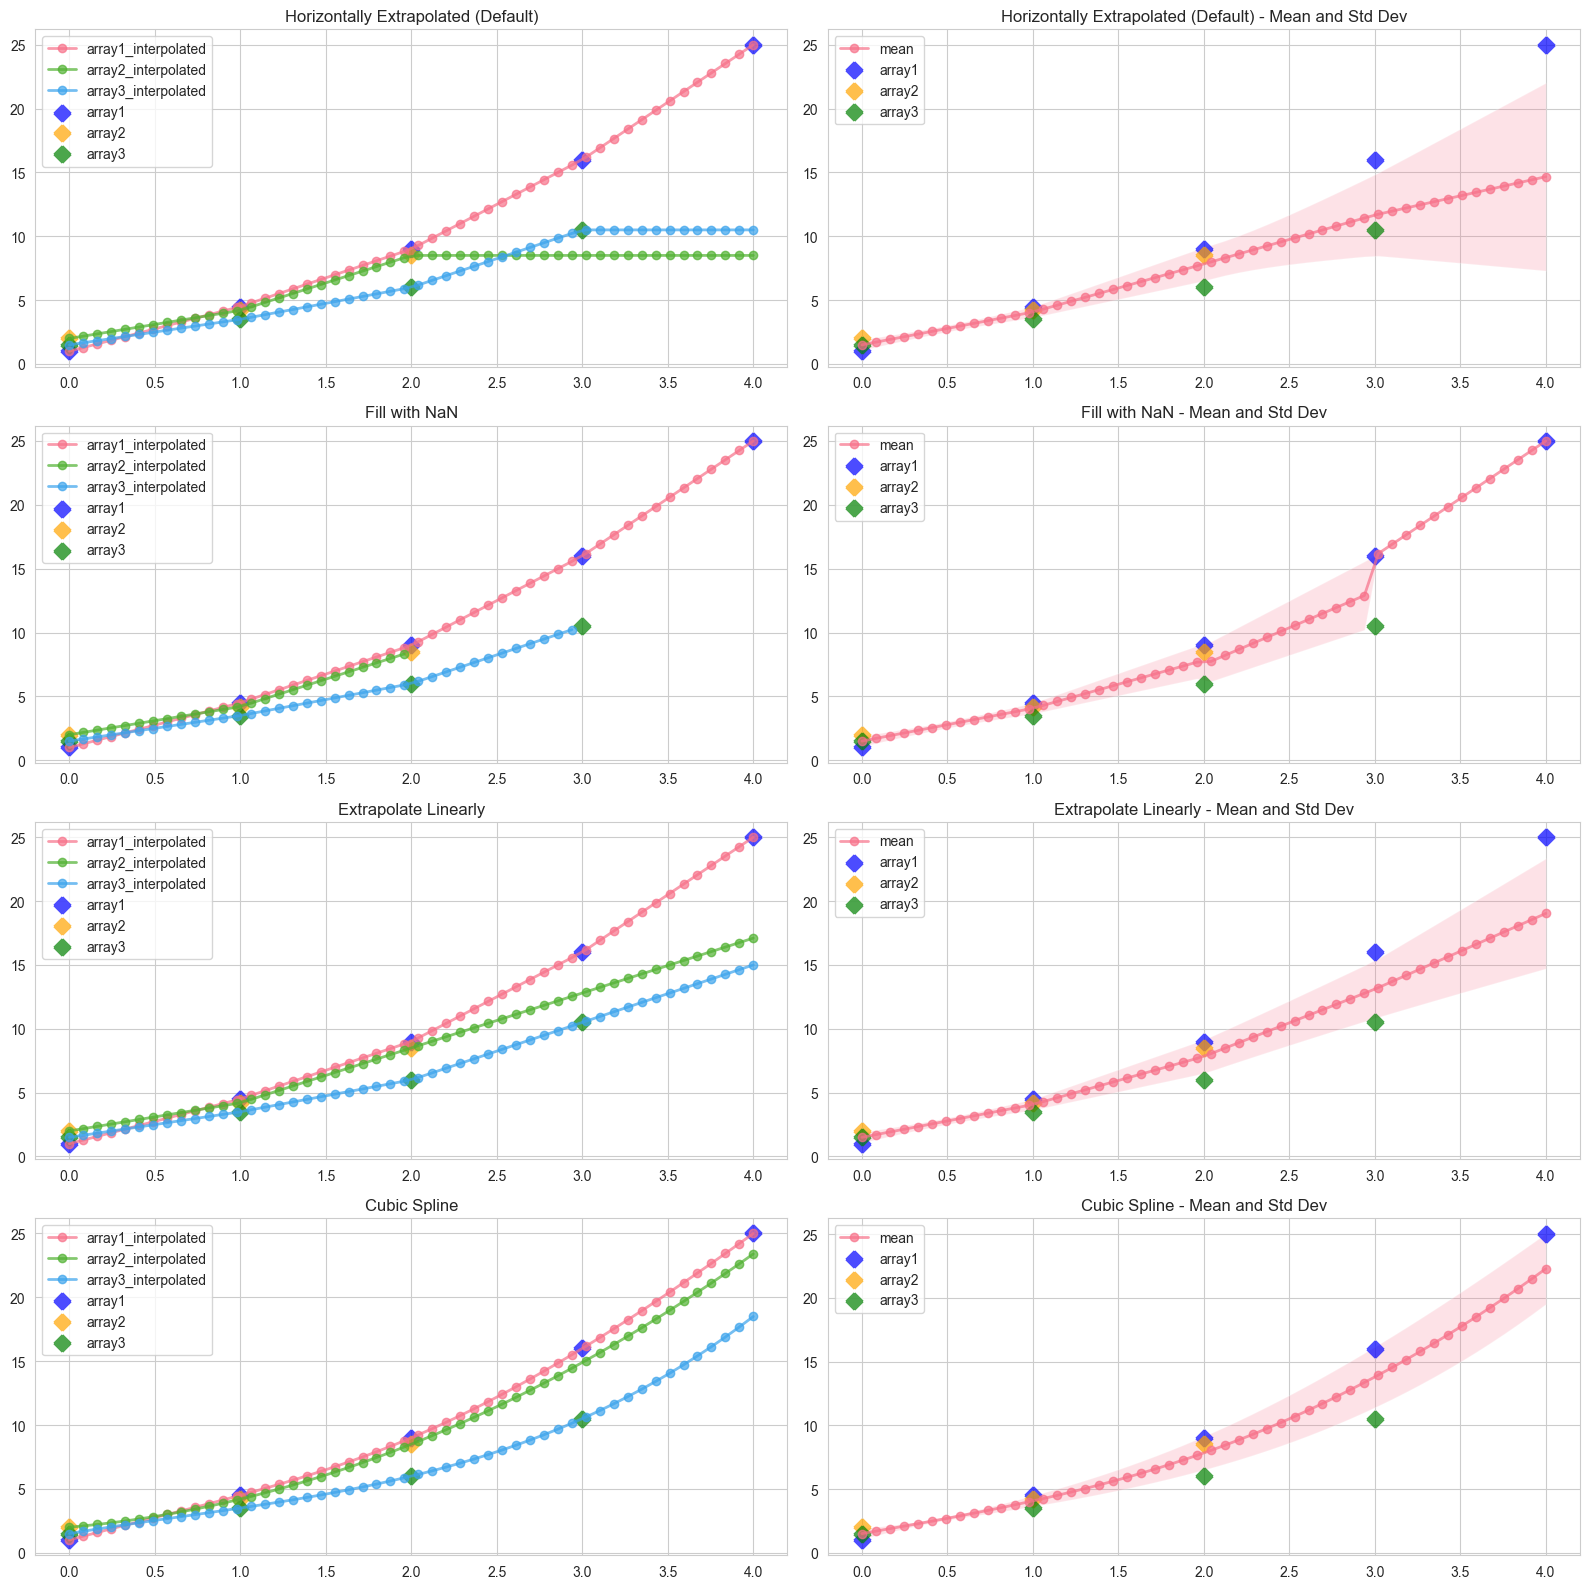

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the common x-axis based on the maximum length
max_length = max(len(array1), len(array2), len(array3))

# common_x_axis = np.arange(0, max_length, 1)
common_x_axis = np.linspace(0, max_length - 1, 50)  # Increase number of points for finer interpolation


from scipy.interpolate import CubicSpline

def cubic_spline_interpolation(arr, x_axis, common_x):
    # Initialize the spline with extrapolation enabled
    spline = CubicSpline(x_axis, arr, extrapolate=True)
    return spline(common_x)


# Function to interpolate or extrapolate based on given parameters
def interpolate_array(arr, x_axis, common_x, method="edge", left_val=np.nan, right_val=np.nan):
    if method == "edge":
        return np.interp(x=common_x, xp=x_axis, fp=arr)
    elif method == "nan":
        return np.interp(x=common_x, xp=x_axis, fp=arr, left=left_val, right=right_val)
    elif method == "linear":
        interp_values = np.interp(x=common_x, xp=x_axis, fp=arr)
        # Calculate slopes for extrapolation
        slope_left = (arr[1] - arr[0]) / (x_axis[1] - x_axis[0])
        slope_right = (arr[-1] - arr[-2]) / (x_axis[-1] - x_axis[-2])

        # Left extrapolation
        left_extrap = arr[0] + slope_left * (common_x[common_x < x_axis[0]] - x_axis[0])

        # Right extrapolation
        right_extrap = arr[-1] + slope_right * (common_x[common_x > x_axis[-1]] - x_axis[-1])

        # Combine interpolated and extrapolated values
        interp_values[common_x < x_axis[0]] = left_extrap
        interp_values[common_x > x_axis[-1]] = right_extrap
        return interp_values
    elif method == "cubic":
        return cubic_spline_interpolation(arr, x_axis, common_x)
    


# Plotting setup
fig, ax = plt.subplots(figsize=(16, 16), nrows=4, ncols=2)

# Interpolations: Edge, NaN, and Linear Extrapolation
methods = ["edge", "nan", "linear", "cubic"]
titles = ["Horizontally Extrapolated (Default)", "Fill with NaN", "Extrapolate Linearly", "Cubic Spline"]

# Interpolation and plotting loop
for i, method in enumerate(methods):
    # Interpolate each array according to the chosen method
    array1_interpolated = interpolate_array(array1, np.arange(len(array1)), common_x_axis, method=method)
    array2_interpolated = interpolate_array(array2, np.arange(len(array2)), common_x_axis, method=method)
    array3_interpolated = interpolate_array(array3, np.arange(len(array3)), common_x_axis, method=method)

    # Plot interpolated arrays
    left_ax = ax[i][0]
    left_ax.plot(common_x_axis, array1_interpolated, label="array1_interpolated", alpha=0.7, marker="o", lw=2)
    left_ax.plot(common_x_axis, array2_interpolated, label="array2_interpolated", alpha=0.7, marker="o",  lw=2)
    left_ax.plot(common_x_axis, array3_interpolated, label="array3_interpolated", alpha=0.7, marker="o", lw=2)
    left_ax.scatter(np.arange(len(array1)), array1, label="array1", color="blue", alpha=0.7 , marker="x", lw=10)
    left_ax.scatter(np.arange(len(array2)), array2, label="array2", color="orange", alpha=0.7, marker="x", lw=10)
    left_ax.scatter(np.arange(len(array3)), array3, label="array3", color="green", alpha=0.7, marker="x", lw=10)

    left_ax.set_title(titles[i])
    left_ax.legend(loc="upper left")

    # Mean and standard deviation plot for the interpolated arrays
    interpolated_stacked = np.vstack([array1_interpolated, array2_interpolated, array3_interpolated])
    mean_func = np.mean if method != "nan" else np.nanmean
    std_func = np.std if method != "nan" else np.nanstd

    interpolated_mean = mean_func(interpolated_stacked, axis=0)
    interpolated_std = std_func(interpolated_stacked, axis=0)

    right_ax = ax[i][1]
    right_ax.plot(common_x_axis, interpolated_mean, label="mean", alpha=0.7, marker="o", lw=2)
    right_ax.fill_between(
        common_x_axis, interpolated_mean - interpolated_std, interpolated_mean + interpolated_std, alpha=0.2
    )
    right_ax.scatter(np.arange(len(array1)), array1, label="array1", color="blue", alpha=0.7 , marker="x", lw=10)
    right_ax.scatter(np.arange(len(array2)), array2, label="array2", color="orange", alpha=0.7, marker="x", lw=10)
    right_ax.scatter(np.arange(len(array3)), array3, label="array3", color="green", alpha=0.7, marker="x", lw=10)
    right_ax.set_title(f"{titles[i]} - Mean and Std Dev")
    right_ax.legend(loc="upper left")

# Tight layout for clarity
fig.tight_layout()
plt.show()

# Y values
array1 = np.array([1.0, 4.5, 9.0, 16.0, 25.0])  # Quadratic growth pattern
array2 = np.array([2.0, 4.2, 8.5])  # Exponential-like growth
array3 = np.array([1.5, 3.5, 6.0, 10.5])  # Moderate nonlinear increase

# common_x_axis = np.arange(0, max_length, 1)
#